In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Part A

## 1.A

In [2]:
prob = round(400 / 2000,4) 
print('joint probability of the people who planned to purchase and actually placed an order is %1.2f' % prob)

joint probability of the people who planned to purchase and actually placed an order is 0.20


### 1.B

In [3]:
prob2   = (400 / 2000 )/ (500 / 2000)
print('Probability of the people who planned to purchase and actually placed an order, given that people planned to\npurchase is %1.2f' % prob2)  

Probability of the people who planned to purchase and actually placed an order, given that people planned to
purchase is 0.80


### 2.A

In [4]:
fail_rate = 0.05
num = 10
quantiles = np.arange(0,11)

In [5]:
binomial = stats.binom.pmf(quantiles,num,fail_rate)

In [6]:
print( "Probability that none of the items are defective is %1.5f" %binomial[0])

Probability that none of the items are defective is 0.59874


### 2.B

In [7]:
print("Probability that exactly one of the items is defective is %1.5f" %binomial[1])

Probability that exactly one of the items is defective is 0.31512


### 2.C

In [8]:
cumbinomial = stats.binom.cdf(quantiles,num,fail_rate)

In [9]:
print("Probability that two or fewer of the items are defective : %1.5f" %cumbinomial[2])

Probability that two or fewer of the items are defective : 0.98850


### 2.D

In [10]:
print("Probability that three or more of the items are defective is %1.5f" %(1- cumbinomial[2]))

Probability that three or more of the items are defective is 0.01150


### 3.A

In [11]:
mean = 3
n    =  np.arange(0,16)
poisson = stats.poisson.cdf(n,mean)
poisson

array([0.04978707, 0.19914827, 0.42319008, 0.64723189, 0.81526324,
       0.91608206, 0.96649146, 0.9880955 , 0.99619701, 0.99889751,
       0.99970766, 0.99992861, 0.99998385, 0.9999966 , 0.99999933,
       0.99999988])

In [12]:
print("Probability that in a given week he will sell some cars is : %1.5f" %(1-poisson[0]))

Probability that in a given week he will sell some cars is : 0.95021


## 3.B

In [13]:
print(" Probability that in a given week he will sell 2 or more but less than 5 cars is : %1.5f" %(poisson[4]-poisson[1]))

 Probability that in a given week he will sell 2 or more but less than 5 cars is : 0.61611


## 3.C

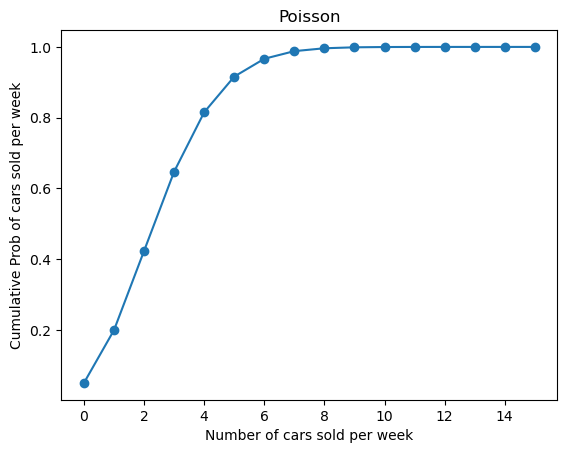

In [14]:
poisson = stats.poisson.cdf(n,mean)
plt.plot(n,poisson, 'o-')
plt.title('Poisson')
plt.xlabel('Number of cars sold per week')
plt.ylabel('Cumulative Prob of cars sold per week')
plt.show()

### 4.A

In [15]:
print("the probability that all three orders will be recognised correctly is 65.4%")

the probability that all three orders will be recognised correctly is 65.4%


#### 4.B

In [16]:
print("the probability that none of the three orders will be recognised correctly is  0.23%")

the probability that none of the three orders will be recognised correctly is  0.23%


### 4.C

In [17]:
print("the probability that at least two of the three orders will be recognised correctly is 95.24%")

the probability that at least two of the three orders will be recognised correctly is 95.24%


### 5

the concepts learnt in this module of Applied Statistics can be used to get data driven business solution for Any product based industry where there is a margin of error e.g <br>
<br>
In a motherboard manufacturing unit it can be used to see with what margin of error will the manufactured board be made correctly and then the production line can be tweaked accordingly to get the most cost-efficient production line.<br>
<br>
They can also be used in quality assurance of the manufactured boards to see how many defective products can potentially go undetected and then decide whether to provide another layer of quality checks <br>
<br>

## Part B

## 1

In [18]:
#to read and store the data from csv file to a dataframe

basketball_data = pd.read_csv("DS+-+Part2+-+Basketball.csv")
basketball_data.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [19]:
# The "TeamLaunch" column was cleaned using regex to get one full year from the values 
# which had whole string containing two years and some other characters
basketball_data["TeamLaunch"] = basketball_data["TeamLaunch"].str[:4]
basketball_data["TeamLaunch"]


0     1929
1     1929
2     1929
3     1931
4     1929
      ... 
56    2009
57    1956
58    1951
59    1955
60    2017
Name: TeamLaunch, Length: 61, dtype: object

In [20]:
# The following loop first converts the values in dataframe into float then replaces all the null(nan) values with 0
#  and converts the values in int format for further calculations

for col in basketball_data.columns:
    if not (col == "Team"):
        basketball_data[col] = pd.to_numeric(basketball_data[col], errors="coerce")
        basketball_data[col] = basketball_data[col].replace(np.nan, 0, regex=True)
        basketball_data[col] = basketball_data[col].astype(int)
        
display(basketball_data)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Team 57,1,34,38,8,10,20,38,66,0,0,2009,20
57,Team 58,1,22,30,7,8,15,37,57,0,0,1956,16
58,Team 59,1,19,30,7,5,18,51,85,0,0,1951,16
59,Team 60,1,14,30,5,4,21,34,65,0,0,1955,15


In [21]:
# the given information seems skewed in favour of older teams and to balance that we take an average of all stats
# approximating some of the info as a "per year average"

# we calculate the total years the team has been active from their inception
active_years = []
for val in basketball_data["TeamLaunch"]:
    active_years.append(2018 - val) 
    
display(active_years)

[89,
 89,
 89,
 87,
 89,
 84,
 89,
 89,
 79,
 86,
 77,
 79,
 70,
 89,
 74,
 83,
 69,
 85,
 58,
 67,
 20,
 77,
 41,
 59,
 14,
 83,
 57,
 78,
 88,
 55,
 44,
 75,
 41,
 31,
 77,
 27,
 11,
 56,
 24,
 40,
 47,
 55,
 19,
 4,
 89,
 28,
 71,
 22,
 23,
 73,
 65,
 89,
 39,
 89,
 68,
 2,
 9,
 62,
 67,
 63,
 1]

In [22]:

#this dataframe is to save the "per year average" stats needed to balance the disparity in our gathered info
per_year_stats = pd.DataFrame()
per_year_stats["Team"] = basketball_data["Team"]

# The loops leaves certain column which will not be helpful after being converted on "per year" basis
# and takes the values of the rest of columns dividing their values by the "active years" and rounding 
# them beack to nearest integer
for col in basketball_data.columns:
    temp = []
    if col in ["Team", "TeamLaunch", "TournamentChampion", "Runner-up", "HighestPositionHeld"]:
        continue
    else:
        i = 0
        for val in basketball_data[col]:
            temp.append(round(val/active_years[i]))
            i+=1
    per_year_stats[col+"_per_year"] = temp
    
#the "per_year_stats" is then copied on "clean_data" dataframe for further processing
clean_data = per_year_stats.copy(deep=True)
for i in ["TeamLaunch", "TournamentChampion", "Runner-up", "HighestPositionHeld"]:
    clean_data[i] = basketball_data[i]
    
display(clean_data)

,Team,Tournament_per_year,Score_per_year,PlayedGames_per_year,WonGames_per_year,DrawnGames_per_year,LostGames_per_year,BasketScored_per_year,BasketGiven_per_year,TeamLaunch,TournamentChampion,Runner-up,HighestPositionHeld
0,Team 1,1,49,31,19,6,6,67,35,1929,33,23,1
1,Team 2,1,48,31,18,6,7,66,35,1929,25,25,1
2,Team 3,1,39,29,14,7,9,51,37,1929,10,8,1
3,Team 4,1,39,31,14,7,10,51,40,1931,6,6,1
4,Team 5,1,38,31,14,7,10,52,42,1929,8,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Team 57,0,4,4,1,1,2,4,7,2009,0,0,20
57,Team 58,0,0,0,0,0,0,1,1,1956,0,0,16
58,Team 59,0,0,0,0,0,0,1,1,1951,0,0,16
59,Team 60,0,0,0,0,0,0,1,1,1955,0,0,15


## 2

### To provide the best recommendations

the given data points seemed biased towaards older teams, To counter-balance some of that new stats were calculated such as on an average games played in an year , average games won by each team in an year. This was done by taking the total years each team has been active for and then using them to divide the stats to provide an approximation of on an average stats Each team was then given a rating based on the stats. The rating was given by measuring how far the value of stats was from the mean by orders of standard deviation if the value lied between (mean + std, mean - std) it was given a rating of 1/-1 depending on the direction in which the value lied, if the value lied between(mean + std, mean+ 2*std) the rating given was 2/-2 and so on there were some stats taht were not measured in "per-year" format as that made the datapoints useless or disruptive like the tournaments won and runner ups.

Based on the stats the new teams seems to be quite lacking as compared to the old giants but the old teams probabily already have contracts and need to be tested on that before making a contract on the other hand there are some newer teams that seems promising like team 25, off all the newer teams that eemed to be most promising and as it is relatively quite new the probability of it not having a contract yet are is quite high But we should still not hesitate to poach older teams as they may be having some differences with their current managers and they are the tried and tested teams with all the sttats being so skewed in thwie favour that the data needed to be crunched in different ways to make the bias lee visible

In [23]:
#list to store the means of each column
data_means = []

#list to store standard deviation of each column
data_stds =[]


#this loop adds all the mean and standard deviation values of columns EXCEPT "Team" and "Tournaament_per_year"
for col in clean_data:
    if not (col in ["Team", "Tournament_per_year"]):
        data_means.append(round(clean_data[col].mean()))
        data_stds.append(round(clean_data[col].std()))
        
# This dataframe will be used to store the ratings of every team for each column        
dundy = pd.DataFrame()


#an iterator used to iterate through our lists storing mean and standard deviation
i = 0

#list where the rating needs to be calculated in opposite manner
less_better = ["LostGames_per_year", 'BasketGiven_per_year', 'HighestPositionHeld']


#this loop gives the rating based on how far from the mean for that column the value is
for col in clean_data.columns:
    tepy = []
    if (col == "Team"):
        continue
    
    #Tournament_per_year is too low of a value to further divide it and get any meaningful observation or data
    # Thus it is added as it is to rating system
    if col == "Tournament_per_year":
        for v in clean_data[col]:
            tepy.append(v)
    
    
    else:
        for val in clean_data[col]:
            tempp = 0
            if val > data_means[i]:
                x = data_means[i]
                
                # The following while loop is used to measure how far from the mean the value lies 
                #by using factors of standard deviation and awards the rating depeending on that
                while val > x:
                    tempp+=1
                    x = data_means[i] + (tempp*data_stds[i])
                
            elif val < data_means[i]:
                x = data_means[i]
                while val < x:
                    tempp-=1
                    x = data_means[i] + (tempp*data_stds[i])
                    
            #the conditions to check whether the rating needs to be negative of it's value
            # it is the added on the list 
            if col in less_better:
                tepy.append(-1*tempp)
            elif col == "DrawnGames_per_year":
                tepy.append(0)
            else:
                tepy.append(tempp)
                
        #increment of iterator used to iterate over mean and std list        
        i+=1
        
        #ratings added to the dataframe dedicated to the rarings for each individual column
        dundy[col + "_rating"] = tepy
        
#adding the finally calculated ratings to the cleaned dataframe
clean_data["rating"] = dundy.sum(axis=1)
        
final_recommendations = clean_data[clean_data["rating"] > 0]
display(final_recommendations)

,Team,Tournament_per_year,Score_per_year,PlayedGames_per_year,WonGames_per_year,DrawnGames_per_year,LostGames_per_year,BasketScored_per_year,BasketGiven_per_year,TeamLaunch,TournamentChampion,Runner-up,HighestPositionHeld,rating
0,Team 1,1,49,31,19,6,6,67,35,1929,33,23,1,20
1,Team 2,1,48,31,18,6,7,66,35,1929,25,25,1,18
2,Team 3,1,39,29,14,7,9,51,37,1929,10,8,1,9
3,Team 4,1,39,31,14,7,10,51,40,1931,6,6,1,6
4,Team 5,1,38,31,14,7,10,52,42,1929,8,7,1,9
5,Team 6,1,34,29,12,6,11,44,40,1934,1,4,1,6
6,Team 7,1,31,30,11,7,12,41,44,1929,0,0,3,1
7,Team 8,1,29,26,10,6,10,36,36,1929,2,3,1,5
9,Team 10,1,22,20,7,5,8,25,29,1932,1,0,1,2
10,Team 11,1,24,20,7,5,7,27,28,1941,1,5,1,4


## 3

### The data points collected have been quite insightefull yet a bit lacking:

The tournaments played stat is the most useful and insightful data point provided, but it would have been more insightful if it mentioned that the tournaments played were of similar level, or if not then the level of tournament might have been used to provide points to even this disparity out

The score data point is also quite useful but it also adds to the bias towards the older teams, and any basketball match can either be quite high scoring one where both team score quite high and one still has to lose, this can make a false impression of a team seeming to be better on paper then it is on field

played games shows how much experienced the team's staff and players are but it again like most data points gathered here is biased towards the older team. And it can also be deceptive as the players and staff who participated in most these matches can already be retired or transferred and not on the team, but it still shows the foundational integriy in the infrastructure of the team

won games again gives the bias towards the older teams but it also shows that the team's staff and players are dedicated to their crafts and the teams with more won games has at least a good crew which is facilitating the plays and growth of the players or great and talented players or both

lostgames showed that the teams with more lost games might not be able to move up as there is probably something hindering the team be it players or the staff and the ones with high lost games should be avoided as our management may not be a push capable enough to gete them to win more

basketscored is an excellent data point to estimate the level of players but this stat can be improved if the stat only represented the players on the team and the bench and not of all the generations of a team

high baskets given shows a lack of defence and can, if other stats suit the company, be easily mended

highest position held is a very disruptive and an uninsightfull data point,by itself it is quite deceotive and may even be counterproductive for assessmnt, it should be either with other stats like a data point that shows how many times has that highest position been reached by the team or a stat showing the average position that team gets in a tournament so that it can be concluded whether the highest position data point is just an oulier or not

tournament champion shows the established giants but it also can be inferred that these teams probably already have a manager contract and to poach them company may need to invest more compared to a more growing team.

runner ups shows the contenders and is a pretty good criteria for choosing which team to approach it would be better if it was also shown how long ago was the last time the team reached that position and what was the level of that tournament

team launch shows how old and established the team is or wheteher the team is new an upcoming beast for our contractual benefits the newer teams are better as they need less investment and are probabily not already in a contract

## Part C

## 1

In [24]:
company = pd.read_csv("DS+-+Part3+-+CompanyX_EU.csv")
display(company)

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


## 2.A

In [25]:
types_d = company.dtypes
print(types_d)

Startup           object
Product           object
Funding           object
Event             object
Result            object
OperatingState    object
dtype: object


## 2.B

In [26]:
print(company.isnull())
company.isnull().values.any()


     Startup  Product  Funding  Event  Result  OperatingState
0      False    False     True  False   False           False
1      False    False    False  False   False           False
2      False    False     True  False   False           False
3      False    False    False  False   False           False
4      False    False     True  False   False           False
..       ...      ...      ...    ...     ...             ...
657    False    False    False  False   False           False
658    False    False    False  False   False           False
659    False    False    False  False   False           False
660    False    False    False  False   False           False
661    False    False    False  False   False           False

[662 rows x 6 columns]


True

## 3.A

In [27]:
company.dropna(inplace=True)

print(company.isnull())
company.isnull().values.any()

     Startup  Product  Funding  Event  Result  OperatingState
1      False    False    False  False   False           False
3      False    False    False  False   False           False
5      False    False    False  False   False           False
6      False    False    False  False   False           False
10     False    False    False  False   False           False
..       ...      ...      ...    ...     ...             ...
657    False    False    False  False   False           False
658    False    False    False  False   False           False
659    False    False    False  False   False           False
660    False    False    False  False   False           False
661    False    False    False  False   False           False

[446 rows x 6 columns]


False

## 3.B

In [28]:
company["Funding"]

1       $630K
3         $1M
5      $19.3M
6        $29M
10      $1.8M
        ...  
657       $8M
658       $1M
659     $223M
660     $3.4M
661    $31.5M
Name: Funding, Length: 446, dtype: object

In [29]:
company["Funding"].sample(5)

322      $2.3M
65         $2M
443      $3.5M
200    $310.5K
388        $1M
Name: Funding, dtype: object

In [30]:


#company.loc[:,'Funds_in_million'] = company['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))
#company.loc[:,'Funds_in_million'] = company['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))
company.loc[:,'Funds_in_million'] = company['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))
company[["Funds_in_million","Funding"]]



,Funds_in_million,Funding
1,0.63,$630K
3,1.00,$1M
5,19.30,$19.3M
6,29.00,$29M
10,1.80,$1.8M
...,...,...
657,8.00,$8M
658,1.00,$1M
659,223.00,$223M
660,3.40,$3.4M


## 3.C

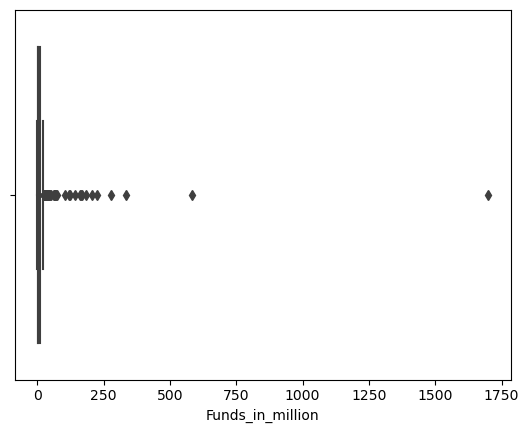

In [31]:


import seaborn as sns

ax = sns.boxplot(x=company["Funds_in_million"])



## 3.E

In [34]:
count = company['OperatingState'].value_counts()
print(count[0])

319


## 4.A

Companies still operating generally has more funding then companies closed

## 4.B

Null Hypothesis
There is no statistically significant relationship between the funding a startup has and the operational state it is in

Alternative hypothesis
The funding a start up has directly influences the operational status of the startup.

## 4.D

In [36]:
company_copy = pd.read_csv("DS+-+Part3+-+CompanyX_EU.csv")
display(company_copy)

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


## 4.E

In [37]:
copy = company['OperatingState'].value_counts()
print(copy)

Operating    319
Acquired      66
Closed        57
Ipo            4
Name: OperatingState, dtype: int64
